
 l* is:
[1. 5. 2. 4. 6. 3.]

 d* is:
[0.70710678 0.70710678 1.22474487 1.22474487 1.94855716 5.40089278]

 i is:
[6. 5. 4. 3. 2. 1.]


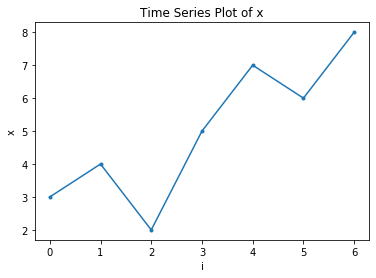

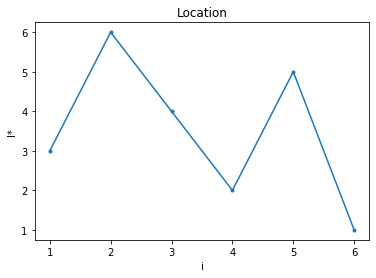

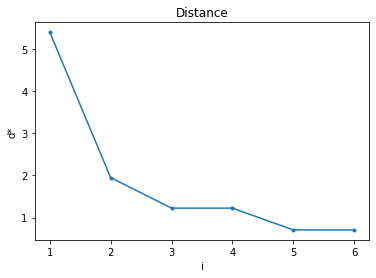

In [4]:
## This is my master program for change point analysis. All results were
## verified for accuracy against hand calculations performed in Excel. 
## From the graphs below, you can clearly see one change point at 
## location 3.

import numpy as np
import math
from matplotlib import pyplot as plt

# Initial Data Set
x = np.array([3.,4.,2.,5.,7.,6.,8.0])
x2 = np.copy(x)
i = np.array([])
lstar = np.array([])
dstar = np.array([])

# Initialize variables n and p and assign values 
# coresponding to the length of array x
#x2[] = np.append(x2,x)
n = len(x)
p = len(x)-1

# Initialize array m the length of array x and set it to all ones
m = np.ones((n), dtype=int)
b = np.arange(1.0,n,1.0)
b2 = np.arange(0,n,1)

# For loop for 
for j in range(p):
    
    # Reset the d array
    d = np.array([])
    y = 0  
    n = n-1
    z = 0
    
    # Nested For Loop to calculate the absolute value for the 
    # Student's t-statistic for a difference in two means, then 
    # assign it to the d array. 
    for k in range(n):

        y = abs(x[k]-x[k+1])/ math.sqrt((m[k]+m[k+1])/(m[k]*m[k+1]))
        
        # Build d array using calculated values from y
        d = np.append(d,y)

    # Find the minimum value in the d array and assign it to the next 
    # available index of the d* array.
    dmin = d.min()
    dstar = np.append(dstar,dmin)
    
    # Find the index of the minimum value in the d array and assign it 
    # to the next available index of the l* array.
    l = d.argmin()
    z = b[l]
    b = np.delete(b,l)
    lstar = np.append(lstar,z)
        
       # Take the average of x[k] and x[k+1], then replace x[k] and x[k+1] in the  
    # x array with the averaged value.
    x[l] = (x[l]+x[l+1])/2
    x = np.delete(x,l+1)
    
    # Take the sum of m[k] and m[k+1], then replace m[k] and m[k+1] in the  
    # m array with the averaged value.
    m[l] = (m[l]+m[l+1])
    m = np.delete(m,l+1)
    
    # Append the i array to corespond with the values in the d* array
    i = np.append(i,n)
    
print("\n l* is:")
print(lstar)
print("\n d* is:")
print(dstar)    
print("\n i is:")
print(i)


## This is my code to create the Change Point Detection plot
# x plot
plt.plot(b2,x2,'.-')
plt.xlabel("i")
plt.ylabel("x")
plt.title('Time Series Plot of x')
plt.show()

# l* plot
plt.plot(i,lstar,'.-')
plt.xlabel("i")
plt.ylabel("l*")
plt.title('Location')
plt.show()

# d* plot
plt.plot(i,dstar,'.-')
plt.xlabel("i")
plt.ylabel("d*")
plt.title('Distance')
plt.show()



 l* is:
[19. 31. 49.  1. 16. 57. 25.  4. 11.  7.  8. 47. 26. 28. 39. 44.  2. 36.
 33. 55. 43. 58. 13. 12. 56. 17. 59. 51. 52. 30.  9.  6. 45. 38. 40. 24.
 27. 50. 22. 14. 10. 46. 20. 18. 23. 42. 34. 35.  5. 53. 54. 41. 32.  3.
 29. 37. 21. 15. 48.]

 d* is:
[0.01343503 0.02828427 0.02828427 0.02828427 0.06363961 0.072832
 0.10606602 0.12303658 0.1350574  0.16263456 0.12655697 0.1767767
 0.1918767  0.20647518 0.24041631 0.24253763 0.24494897 0.31819805
 0.37830213 0.39456558 0.43396793 0.45764633 0.59114127 0.4235
 0.66301816 0.70626954 0.78016232 0.79903066 0.57563009 0.81649658
 0.84567381 0.64421118 0.8796653  1.03695066 0.63652867 1.09335707
 0.84899357 1.14747876 1.18086832 1.20993638 0.84195643 1.24144742
 1.31415125 0.56613832 1.34553533 1.383696   1.38845244 0.95166794
 1.47286329 1.61920481 1.62888553 1.85904601 2.12875795 2.18058645
 2.81675    4.15750754 3.43575855 5.19350064 4.35420758]

 i is:
[59. 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47. 46. 45. 44. 43. 42.
 41. 40

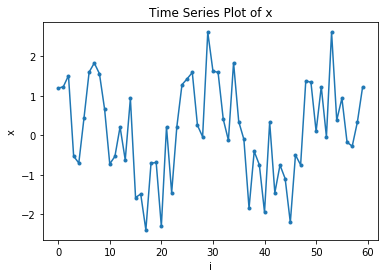

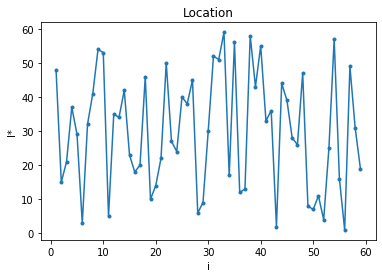

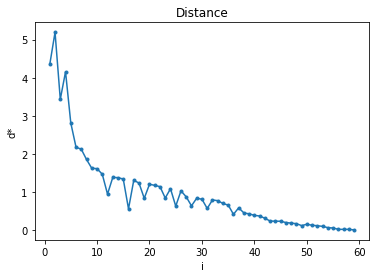

In [2]:
## This is my analysis code for the change point analysis of 
## Sullivan's data set. My program's output differed slightly from
## that of Sullivan's, but it more or less predicted the same
## number of change points. From the graphs below, you can clearly
## see at least 4, potentially 5 change points. They occur at 
## locations 37, 21, 15, and 48.


import numpy as np
import math
from matplotlib import pyplot as plt

# Initial Data Set
x = np.array([1.19,1.23,1.51,-0.531,-0.705,0.429,1.6,1.83,1.56,0.661,
              -0.727,-0.536,0.21,-0.626,0.933,-1.58,-1.49,-2.4,-0.71,
              -0.691,-2.31,0.21,-1.46,0.21,1.28,1.43,1.59,0.252,-0.04,
              2.61,1.63,1.59,0.407,-0.128,1.84,0.346,-0.104,-1.85,
              -0.41,-0.75,-1.95,0.33,-1.46,-0.757,-1.1,-2.21,-0.502,
              -0.752,1.38,1.34,0.1,1.23,-0.04,2.61,0.379,0.937,-0.176,
              -0.279,0.333,1.21])

x2 = np.copy(x)
i = np.array([])
lstar = np.array([])
dstar = np.array([])

# Initialize variables n and p and assign values 
# coresponding to the length of array x
#x2[] = np.append(x2,x)
n = len(x)
p = len(x)-1

# Initialize array m the length of array x and set it to all ones
m = np.ones((n), dtype=int)
b = np.arange(1.0,n,1.0)
b2 = np.arange(0,n,1)

# For loop for 
for j in range(p):
    
    # Reset the d array
    d = np.array([])
    y = 0  
    n = n-1
    z = 0
    
    # Nested For Loop to calculate the absolute value for the 
    # Student's t-statistic for a difference in two means, then 
    # assign it to the d array. 
    for k in range(n):

        y = abs(x[k]-x[k+1])/ math.sqrt((m[k]+m[k+1])/(m[k]*m[k+1]))
        
        # Build d array using calculated values from y
        d = np.append(d,y)
   
    # Find the minimum value in the d array and assign it to the next 
    # available index of the d* array.
    dmin = d.min()
    dstar = np.append(dstar,dmin)
    
    # Find the index of the minimum value in the d array and assign it 
    # to the next available index of the l* array.
    l = d.argmin()
    z = b[l]
    b = np.delete(b,l)
    lstar = np.append(lstar,z)
   
    # Take the average of x[k] and x[k+1], then replace x[k] and x[k+1] in the  
    # x array with the averaged value.
    x[l] = (x[l]+x[l+1])/2
    x = np.delete(x,l+1)
    
    # Take the sum of m[k] and m[k+1], then replace m[k] and m[k+1] in the  
    # m array with the averaged value.
    m[l] = (m[l]+m[l+1])
    m = np.delete(m,l+1)
    
    # Append the i array to corespond with the values in the d* array
    i = np.append(i,n)
    
print("\n l* is:")
print(lstar)
print("\n d* is:")
print(dstar)    
print("\n i is:")
print(i)


## This is my code to create the Change Point Detection plot
# x plot
plt.plot(b2,x2,'.-')
plt.xlabel("i")
plt.ylabel("x")
plt.title('Time Series Plot of x')
plt.show()

# l* plot
plt.plot(i,lstar,'.-')
plt.xlabel("i")
plt.ylabel("l*")
plt.title('Location')
plt.show()

# d* plot
plt.plot(i,dstar,'.-')
plt.xlabel("i")
plt.ylabel("d*")
plt.title('Distance')
plt.show()



 l* is:
[16. 15. 22. 48.  4.  5. 24. 33. 31.  8.  6. 47. 30. 12. 27. 34. 38. 42.
  1. 18. 43. 49. 44. 23.  7.  2.  3. 41. 14. 11. 13. 19. 20. 35. 29. 26.
 28. 46. 37. 39.  9. 17. 25. 32. 10. 45. 40. 36. 21.]

 d* is:
[7.07106781e-03 4.49073120e-02 8.48528137e-02 9.19238816e-02
 9.89949494e-02 1.30639453e-01 1.55563492e-01 1.55563492e-01
 1.90918831e-01 2.89913780e-01 3.98371686e-01 4.12330773e-01
 5.42970226e-01 5.93969696e-01 6.15182900e-01 6.94022094e-01
 7.42462120e-01 7.84888527e-01 7.91959595e-01 8.83883476e-01
 9.83878380e-01 1.01541479e+00 1.06304618e+00 1.09000000e+00
 1.33367912e+00 1.37171426e+00 9.36916485e-01 1.73183465e+00
 1.74287613e+00 1.82078738e+00 1.17673997e+00 1.87385965e+00
 1.38780571e+00 1.98752830e+00 2.05464527e+00 2.21678822e+00
 8.52686406e-01 2.23271388e+00 2.69852120e+00 1.84679917e+00
 2.88281137e+00 3.02237694e+00 3.61069841e+00 2.23346481e+00
 4.32347570e+00 4.59123188e+00 5.23361772e+00 1.33401184e+01
 8.65761837e+00]

 i is:
[49. 48. 47. 46. 45. 44. 

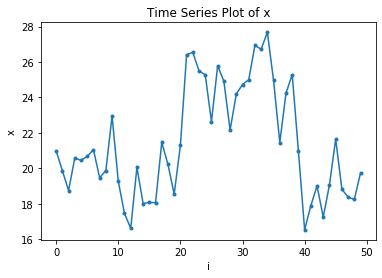

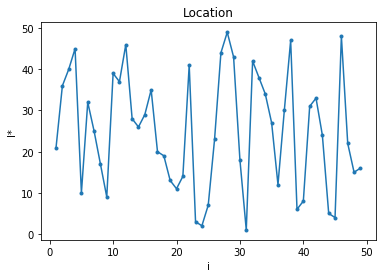

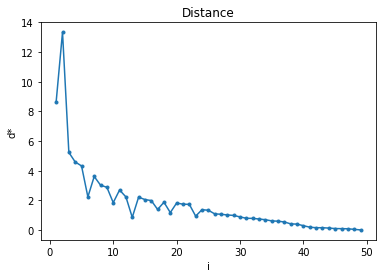

In [5]:
## This is my analysis code for the change point analysis of 
## the data for the A.5 Assignment (File named test641data.txt).
## From the Distance Plot below, you can see that there were two 
## change points in the provided data. They were at locations 36 
## and 21. Because there were multiple change points, it is safe 
## to say that the data was not in a steady state, as its mean 
## shifted at least twice. Therefore it is not identically 
## distributed. 

import numpy as np
import math
from matplotlib import pyplot as plt

# Initial Data Set
x = np.array([20.99,19.87,18.75,20.59,20.45,20.68,21.06,19.47,
              19.88,22.96,19.27,17.46,16.62,20.06,18.02,18.08,
              18.07,21.47,20.22,18.55,21.30,26.42,26.54,25.50,
              25.28,22.64,25.79,24.92,22.16,24.20,24.73,25.00,
              26.94,26.72,27.68,24.96,21.46,24.24,25.29,20.98,
              16.53,17.90,19.01,17.25,19.08,21.65,18.82,18.38,
              18.25,19.74])
x2 = np.copy(x)
i = np.array([])
lstar = np.array([])
dstar = np.array([])

# Initialize variables n and p and assign values 
# coresponding to the length of array x
#x2[] = np.append(x2,x)
n = len(x)
p = len(x)-1

# Initialize array m the length of array x and set it to all ones
m = np.ones((n), dtype=int)
b = np.arange(1.0,n,1.0)
b2 = np.arange(0,n,1)

# For loop for 
for j in range(p):
    
    # Reset the d array
    d = np.array([])
    y = 0  
    n = n-1
    z = 0
    
    # Nested For Loop to calculate the absolute value for the 
    # Student's t-statistic for a difference in two means, then 
    # assign it to the d array. 
    for k in range(n):

        y = abs(x[k]-x[k+1])/ math.sqrt((m[k]+m[k+1])/(m[k]*m[k+1]))
        
        # Build d array using calculated values from y
        d = np.append(d,y)

    # Find the minimum value in the d array and assign it to the next 
    # available index of the d* array.
    dmin = d.min()
    dstar = np.append(dstar,dmin)
    
    # Find the index of the minimum value in the d array and assign it 
    # to the next available index of the l* array.
    l = d.argmin()
    z = b[l]
    b = np.delete(b,l)
    lstar = np.append(lstar,z)
        
    # Take the average of x[k] and x[k+1], then replace x[k] and x[k+1] in the  
    # x array with the averaged value.
    x[l] = (x[l]+x[l+1])/2
    x = np.delete(x,l+1)
    
    # Take the sum of m[k] and m[k+1], then replace m[k] and m[k+1] in the  
    # m array with the averaged value.
    m[l] = (m[l]+m[l+1])
    m = np.delete(m,l+1)
    
    # Append the i array to corespond with the values in the d* array
    i = np.append(i,n)
    
print("\n l* is:")
print(lstar)
print("\n d* is:")
print(dstar)    
print("\n i is:")
print(i)


## This is my code to create the Change Point Detection plot
# x plot
plt.plot(b2,x2,'.-')
plt.xlabel("i")
plt.ylabel("x")
plt.title('Time Series Plot of x')
plt.show()

# l* plot
plt.plot(i,lstar,'.-')
plt.xlabel("i")
plt.ylabel("l*")
plt.title('Location')
plt.show()

# d* plot
plt.plot(i,dstar,'.-')
plt.xlabel("i")
plt.ylabel("d*")
plt.title('Distance')
plt.show()
